# Import the Libraries and Data

In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

df_train=pd.read_csv('../input/train.csv',sep=',')
df_test=pd.read_csv('../input/test.csv',sep=',')

PassengerId = df_test['PassengerId']
Submission=pd.DataFrame()
Submission['PassengerId'] = df_test['PassengerId']

['gender_submission.csv', 'myfirstsubmission.csv', 'test.csv', 'train.csv']


# Explore the data

In [2]:
# How big is the training dataset
print(df_train.shape)

# How big is the test dataset
print(df_test.shape)

(891, 12)
(418, 11)


In [3]:
# What are the column names 
print(df_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# What types of data are columns and how many missing values are there
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [5]:
# Get a statistical overview of the data
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Take a look at some sample data
print(df_train.head(10))
print(df_train.tail(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

# Encode labels as categories

Machine Learning algorithms work on numbers, not strings, if there are strings in the data we need to find a numeric representation of these strings.

In pandas, ‘category’ dtype encodes categorical data numerically. Changing an object type from string to category when it contains categorical information makes it numeric.
Strings can be slow compared to numbers, so using 'category' rather than 'string' can speed up code.

Example : df.Sex.astype('category')

In [8]:
# Encode labels as categories

# Create list of Labels to convert to Categories
LABELS=['Sex','Embarked']

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df_train[LABELS] = df_train[LABELS].apply(categorize_label,axis=0)

# Print the converted dtypes
print(df_train[LABELS].dtypes)    

Sex         category
Embarked    category
dtype: object


# Explore the Training Data : Visually

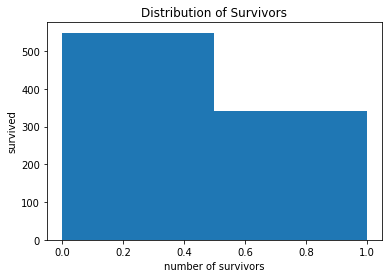

In [50]:
# Create the histogram
plt.hist(df_train['Survived'].dropna(),bins=2)

# Add title and labels
plt.title('Distribution of Survivors')
plt.xlabel('number of survivors')
plt.ylabel('survived')

# Display the histogram
plt.show()

## Pairplots

To get a very basic idea of the relationships between the different features we can use pairplots from seaborn.

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.

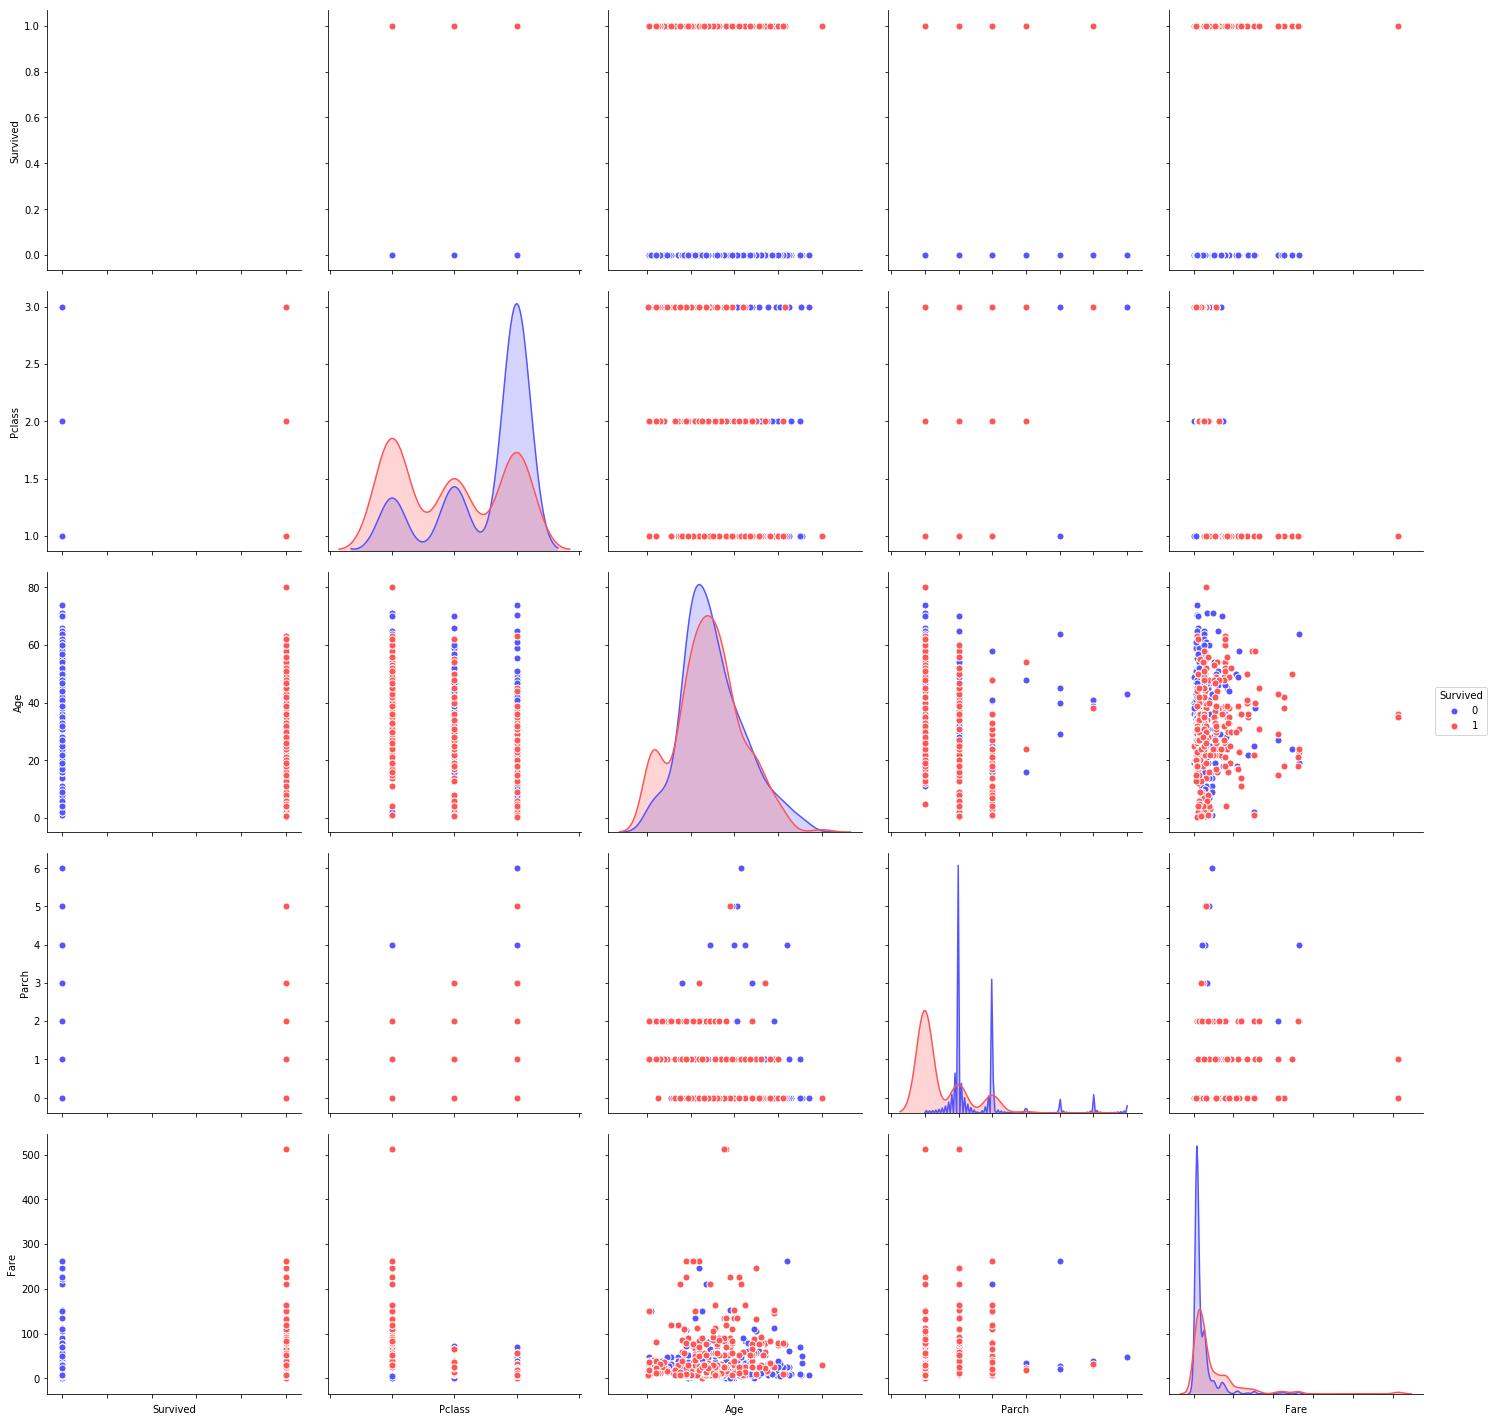

In [57]:
g = sns.pairplot(df_train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic',size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])

## Visualisations

Pearson Correlation Heatmap

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

# Create simple model

Create a baseline score by using old the standard numeric data on on a very basic model, this will be used to see how much any changes we make to the data or model improve performance.

In [59]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Fare']
OTHER_COLUMNS=['Sex', 'Embarked','Name','Ticket','Cabin']

# create test and training data
data_to_train = df_train[NUMERIC_COLUMNS].fillna(-1000)
y=df_train['Survived']
X=data_to_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

clf = SVC()
# clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Check the Accuracy of model on test data

In [47]:
# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.6791044776119403


# Create initial predictions

In [60]:
test = df_test[NUMERIC_COLUMNS].fillna(-1000)

Submission['Survived']=clf.predict(test)
print(Submission.head(5))

   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0


# Make first Submission

Now that we have some predictions we can submit those to the competition and see how our basic model has performed on the test data, wjile this is not likely to score well at this stage it is a great base line on which to evaluate any changes to out model.

In [42]:
# write data frame to csv file
Submission.to_csv('../input/myfirstsubmission.csv',sep=',')

The result of this first submission was a score of 0.57894. This constitutes performing just above random, if i'd simply flipped a coin fair coin for each passenger i could have achieved this kind of score. So there is plenty of room for improvement.

# First attemp at improving the model

## Feature Reduction

In [ ]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

## Feature Engineering

This is based on info from 'introduction-to-ensembling-stacking'.

# Convert male/female Categories to Columns for training data

Once we have Category data, the next stage is to make each category into a column, to do this we use the panda's method get_dummies and use the arguent prefixsep='' to determine what is used in the naming convention on the new columns.

Example : df.Sex.astype('category')

In [73]:
# convert categories to Columns in training data

dummies=pd.get_dummies(df_train[['Sex']], prefix_sep='_') #Sex
df_train = pd.concat([df_train, dummies], axis=1) 
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_female  Sex_male  
0      0         A/5 21171   7.2500   NaN        S           0         1  
1      0          PC 17599  71.2833   C85        C           1         0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1         0  
3      0            

# Re-train the changed model

In [77]:
# Re-evaluate factoring in gender of passenger

NUMERIC_COLUMNS=['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male']
OTHER_COLUMNS=['Embarked','Name','Ticket','Cabin']

# create test and training data
data_to_train = df_train[NUMERIC_COLUMNS].fillna(-1000)
y=df_train['Survived']
X=data_to_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

clf = SVC()
# clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Re-evaluate the changed model

In [78]:
# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.7126865671641791


# Convert male/female Categories to Columns for test data

In [79]:
# convert categories to Columns for test data

dummies=pd.get_dummies(df_test[['Sex']], prefix_sep='_') #Sex
df_test = pd.concat([df_test, dummies], axis=1) 
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_female  Sex_male  
0  34.5      0      0   330911   7.8292   NaN        Q           0         1  
1  47.0      1      0   363272   7.0000   NaN        S           1         0  
2  62.0      0      0   240276   9.6875   NaN        Q           0         1  
3  27.0      0      0   315154   8.6625   NaN        S           0         1  
4  22.0      1      1  3101298  12.2875   NaN        S           1         0  


# Reproduce predictions using new model

In [80]:
test = df_test[NUMERIC_COLUMNS].fillna(-1000)

Submission['Survived']=clf.predict(test)
print(Submission.head(5))

   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0


# Make revised submission

In [83]:
# write data frame to csv file
Submission.to_csv('../input/revisedsubmission.csv',sep=',')

The revised submission scored 0.64593, which is an improvement on the previous score of 0.57894. This advanced the submission 337 places on the leaderboard, to 10599th place! Obviousy a step in the right direction but still needing a lot of work.

## Feature Engineering


In [ ]:
full_data = [train, test]

# Some features of my own that I have added in
# Gives the length of the name
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)
# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Feature engineering steps taken from Sina
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['CategoricalAge'] = pd.cut(train['Age'], 5)
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;